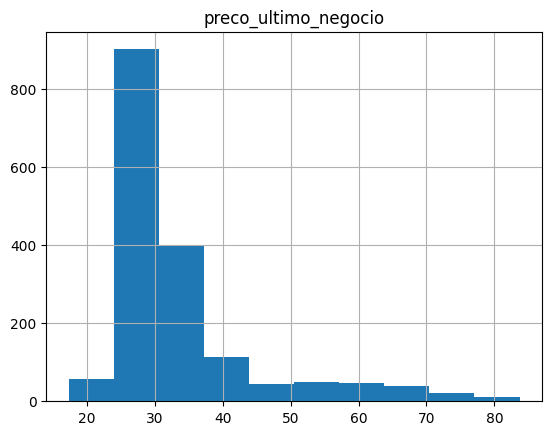

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
 
# Generate random data for the histogram
data = pd.read_csv('../dataset/dados_pregao_tots3.csv', header=0, parse_dates=True)
data = data[['data_pregao', 'preco_ultimo_negocio']]
data.set_index(['data_pregao'], inplace=True)
 

data.hist()
plt.show()

             preco_ultimo_negocio
data_pregao                      
2018-01-02                  30.15
2018-01-03                  30.79
2018-01-04                  30.60
2018-01-05                  31.26
2018-01-08                  31.24


<function matplotlib.pyplot.show(close=None, block=None)>

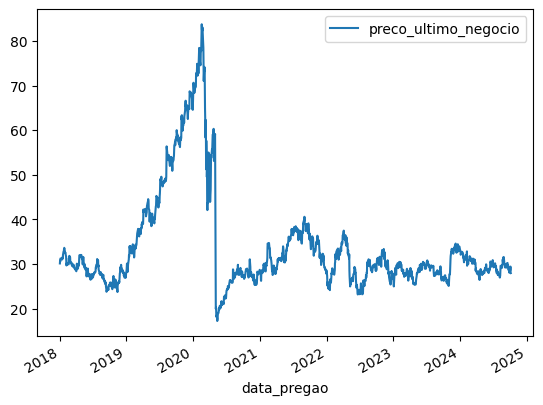

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

data = pd.read_csv('../dataset/dados_pregao_tots3.csv', header=0, parse_dates=True, index_col=0)
df = data[['preco_ultimo_negocio']]
print(df.head())
df.plot()
pyplot.show

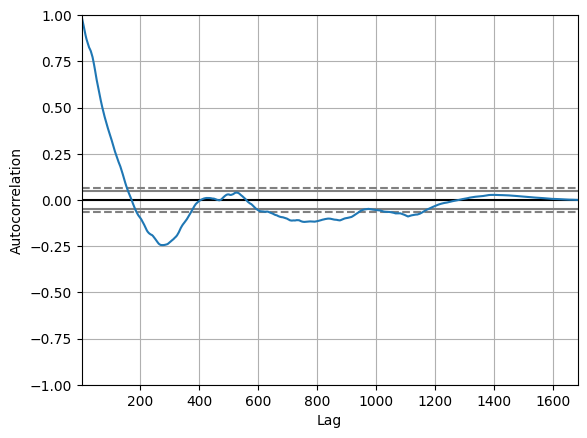

In [2]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
pyplot.show()

In [3]:
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

In [4]:
stepwise_fit = auto_arima(df['preco_ultimo_negocio'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5823.436, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5830.053, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5830.386, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5830.341, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5828.055, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5825.901, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5825.128, Time=0.58 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5819.133, Time=1.64 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5823.595, Time=0.49 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5797.120, Time=2.53 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=5822.885, Time=0.53 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=5820.419, Time=1.37 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=5794.268, Time=2.61 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5803.011, Time=2.64 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept

predicted=28.793654, expected=29.570000
predicted=29.457863, expected=29.700000
predicted=29.799977, expected=29.860000
predicted=29.818001, expected=30.510000
predicted=30.460355, expected=29.950000
predicted=30.020599, expected=29.900000
predicted=29.904887, expected=30.350000
predicted=30.230709, expected=29.880000
predicted=30.040032, expected=29.990000
predicted=29.929518, expected=29.930000
predicted=29.840025, expected=29.500000
predicted=29.662860, expected=28.970000
predicted=28.900603, expected=29.770000
predicted=29.677467, expected=29.370000
predicted=29.515244, expected=29.230000
predicted=29.216522, expected=28.990000
predicted=28.812203, expected=29.570000
predicted=29.795750, expected=29.980000
predicted=29.888739, expected=30.580000
predicted=30.485614, expected=30.290000
predicted=30.405508, expected=30.830000
predicted=30.845046, expected=29.950000
predicted=29.777602, expected=30.500000
predicted=30.712829, expected=30.020000
predicted=29.926716, expected=29.680000


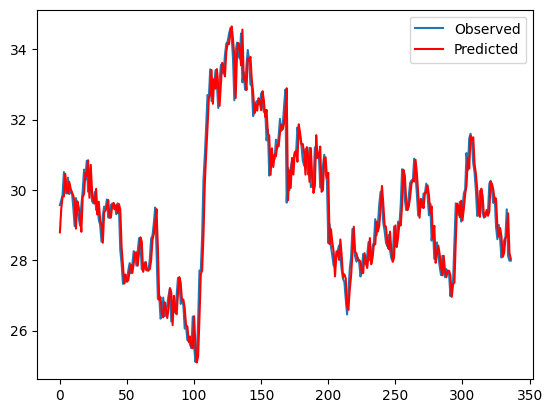

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

X = df.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(4,1,3))
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]

    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(test, label='Observed')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.show()


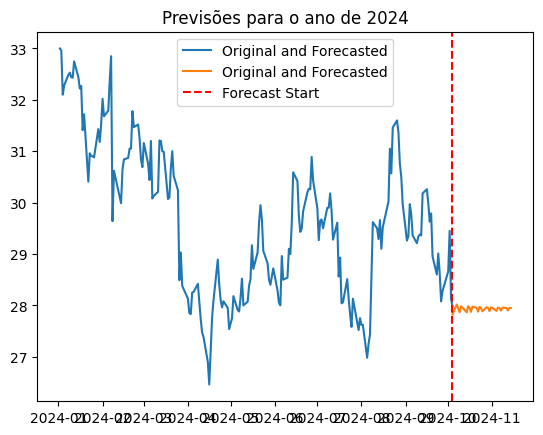

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Preparar o modelo ARIMA e fazer as previsões para os próximos 30 dias
X = df.values
history = [x for x in X]
model = ARIMA(history, order=(4,1,3))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

# Gerar datas futuras
last_date = df.index[-1]
future_dates = pd.date_range(last_date, periods=30, freq='B')

# Adicionar previsões ao DataFrame
forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['Forecast'])
df_with_forecast = pd.concat([df, forecast_df])

# Filtrar os dados apenas para o ano de 2024
df_2024 = df_with_forecast.loc['2024']

# Plotar os dados de 2024
plt.plot(df_2024, label='Original and Forecasted')
plt.axvline(x=last_date, color='red', linestyle='--', label='Forecast Start')
plt.legend()
plt.title('Previsões para o ano de 2024')
plt.show()